In [1]:
import numpy as np
import os
import pandas as pd
import random
from collections import defaultdict
import gym
import gym_minigrid
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
#!pip install gym==0.22

In [8]:
#!pip install gym_minigrid==1.0.3

In [9]:
#!pip install utils==1.0.2

In [7]:
#!pip install imageio-ffmpeg==0.5.1

In [2]:
class QLearning:
    def __init__(self, actions, agent_indicator=10):
        self.actions = actions
        self.agent_indicator = agent_indicator
        self.alpha = 0.01
        self.gamma = 0.9
        self.epsilon = 0.2
        self.q_values = defaultdict(lambda: [0.0] * actions)
        
    def _convert_state(self, s):
        return np.where(s == self.agent_indicator)[0][0]
        
    def update(self, state, action, reward, next_state, next_action):
        state = self._convert_state(state)
        next_state = self._convert_state(next_state)
        
        q_value = self.q_values[state][action]

        ################## write code ################################
        next_q_value = self.q_values[next_state][next_action]
        
        td_error = reward + self.gamma * np.max(next_q_value - q_value)
        self.q_values[state][action] += self.alpha * td_error
        ##############################################################
    
    def act(self, state):
        if np.random.rand() < self.epsilon:
            action = np.random.choice(self.actions)
        else:
            state = self._convert_state(state)
            q_values = self.q_values[state]
            action = np.argmax(q_values)
        return action

In [3]:
from utils import gen_wrapped_env, show_video

In [4]:
env = gen_wrapped_env('MiniGrid-Empty-6x6-v0')

obs = env.reset()

agent_position = obs[0]

agent = QLearning(3, agent_position)

## For Q-Learning
+ Q-learning update

In [5]:
rewards = []
for ep in range(5000):
    done = False
    obs = env.reset()
    action = agent.act(obs)
    
    ep_rewards = 0
    while not done:
        next_obs, reward, done, info = env.step(action)

        next_action = agent.act(next_obs)

        agent.update(obs, action, reward, next_obs, next_action)
        
        ep_rewards += reward
        obs = next_obs
        action = next_action
    rewards.append(ep_rewards)
    if (ep+1) % 20 == 0:
        print("episode: {}, rewards: {}".format(ep+1, ep_rewards))
env.close()

episode: 20, rewards: 0
episode: 40, rewards: 0
episode: 60, rewards: 0
episode: 80, rewards: 0
episode: 100, rewards: 0
episode: 120, rewards: 0
episode: 140, rewards: 0
episode: 160, rewards: 0
episode: 180, rewards: 0
episode: 200, rewards: 0
episode: 220, rewards: 0
episode: 240, rewards: 0
episode: 260, rewards: 0
episode: 280, rewards: 0
episode: 300, rewards: 0
episode: 320, rewards: 0
episode: 340, rewards: 0
episode: 360, rewards: 0
episode: 380, rewards: 0
episode: 400, rewards: 0
episode: 420, rewards: 0
episode: 440, rewards: 0
episode: 460, rewards: 0
episode: 480, rewards: 0
episode: 500, rewards: 0
episode: 520, rewards: 0
episode: 540, rewards: 0
episode: 560, rewards: 0
episode: 580, rewards: 0
episode: 600, rewards: 0
episode: 620, rewards: 0
episode: 640, rewards: 0
episode: 660, rewards: 0
episode: 680, rewards: 0
episode: 700, rewards: 0
episode: 720, rewards: 0
episode: 740, rewards: 0
episode: 760, rewards: 0
episode: 780, rewards: 0
episode: 800, rewards: 0
epis

In [7]:
{s:np.round(q, 5).tolist() for s, q in agent.q_values.items()}

{0: [0.27118, 0.27265, 0.29303],
 3: [0.04941, 0.05841, 0.12391],
 15: [0.01379, 0.01874, 0.14662],
 27: [0.04935, 0.04711, 0.28159],
 12: [0.28576, 0.27949, 0.36056],
 6: [0.03862, 0.03585, 0.09635],
 18: [0.01983, 0.01625, 0.16027],
 24: [0.35293, 0.35523, 0.42916],
 39: [0.45627, 0.45961, 0.55303],
 42: [0.53063, 0.50293, 0.61781],
 30: [0.05483, 0.05325, 0.32912],
 36: [0.47748, 0.4785, 0.48568],
 9: [0.09778, 0.0978, 0.12065],
 21: [0.13694, 0.14623, 0.2591],
 33: [0.28497, 0.2749, 0.42159],
 45: [0.0, 0.0, 0.0]}

In [8]:
show_video()

In [9]:
os.makedirs('./logs', exist_ok=True)
pd.Series(rewards).to_csv('./logs/rewards_qlearning.csv')

In [10]:
sarsa_logs = pd.read_csv('./logs/rewards_sarsa.csv', index_col=False).iloc[:, 1]
q_logs = pd.read_csv('./logs/rewards_qlearning.csv', index_col=False).iloc[:, 1]

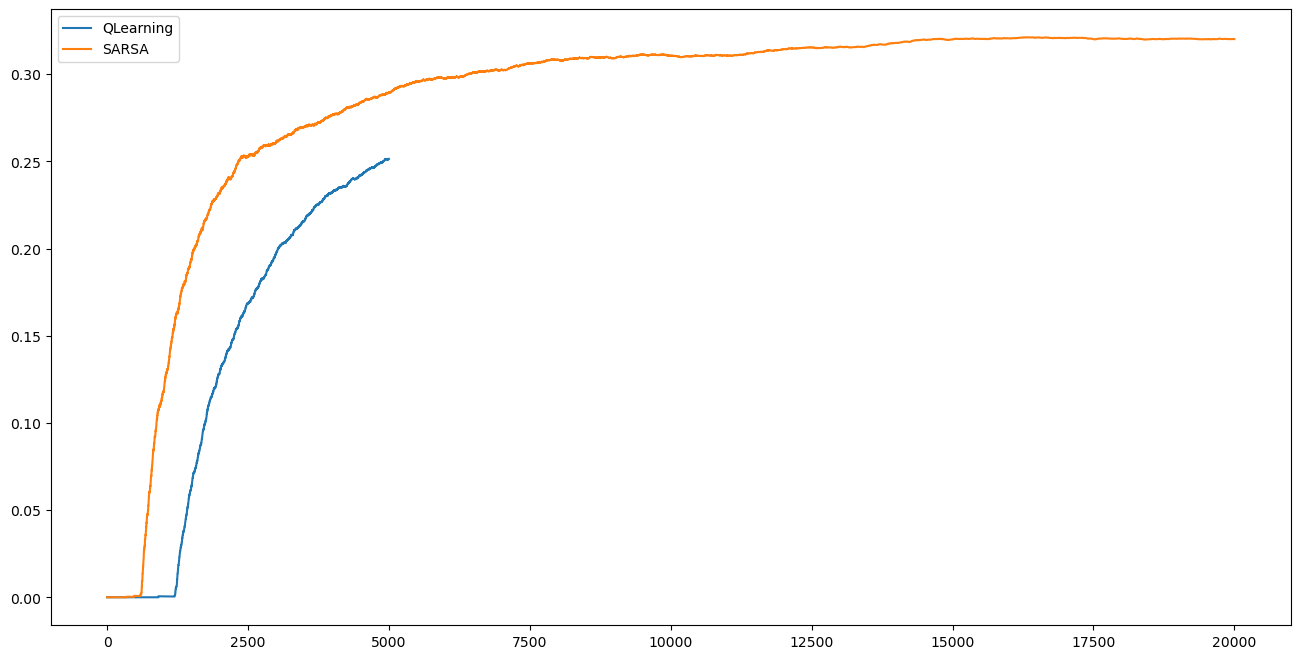

In [11]:
plt.figure(figsize=(16, 8))
plt.plot(q_logs.cumsum() / (pd.Series(np.arange(q_logs.shape[0]))+1), label="QLearning")
plt.plot(sarsa_logs.cumsum() / (pd.Series(np.arange(sarsa_logs.shape[0]))+1), label="SARSA")
plt.legend()